# Model 3

In [45]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [239]:
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')
matches_df_dummy = matches_df[['id','team1', 'team2','toss_winner','toss_decision','win_by_runs','win_by_wickets','winner','result']]
deliveries_df.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over   ...    bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0   ...           0   
1     2  DA Warner    S Dhawan  TS Mills              0   ...           0   
2     3  DA Warner    S Dhawan  TS Mills              0   ...           0   
3     4  DA Warner    S Dhawan  TS Mills              0   ...           0   
4     5  DA Warner    S Dhawan  TS Mills              0   ...           0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [241]:
deliveries_inning_df = deliveries_df.groupby(['match_id','batting_team','inning']).agg({"total_runs": "sum"})
deliveries_inning_df.head(15)
Deliveries_updated_inning = deliveries_inning_df.groupby(['match_id', 'inning']).agg({"total_runs": "max"})
df3 = Deliveries_updated_inning.unstack(level='inning')
df3.drop(df3.columns[[2,3]], axis=1, inplace=True)
df3.columns = ['Inning_1', 'Inning_2']
df3.head()

Inning_1  Inning_2
match_id                    
1            207.0     172.0
2            184.0     187.0
3            183.0     184.0
4            163.0     164.0
5            157.0     142.0

In [242]:
a= df3.reset_index()
a.head(10)
merged_df = pd.merge(left=matches_df_dummy,right=a, how='left', left_on='id', right_on='match_id')
# merged_df = DataFrame(index = idx, data =([1,2,3]))
merged_df.head()

id                        team1                        team2  \
0   1          Sunrisers Hyderabad  Royal Challengers Bangalore   
1   2               Mumbai Indians       Rising Pune Supergiant   
2   3                Gujarat Lions        Kolkata Knight Riders   
3   4       Rising Pune Supergiant              Kings XI Punjab   
4   5  Royal Challengers Bangalore             Delhi Daredevils   

                   toss_winner toss_decision  win_by_runs  win_by_wickets  \
0  Royal Challengers Bangalore         field           35               0   
1       Rising Pune Supergiant         field            0               7   
2        Kolkata Knight Riders         field            0              10   
3              Kings XI Punjab         field            0               6   
4  Royal Challengers Bangalore           bat           15               0   

                        winner  result  match_id  Inning_1  Inning_2  
0          Sunrisers Hyderabad  normal         1     207.0     172.0  
1       Rising Pune Supergiant  normal         2     184.0     187.0  
2        Kolkata Knight Riders  normal         3     183.0     184.0  
3              Kings XI Punjab  normal         4     163.0     164.0  
4  Royal Challengers Bangalore  normal         5     157.0     142.0

In [243]:
merged_df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

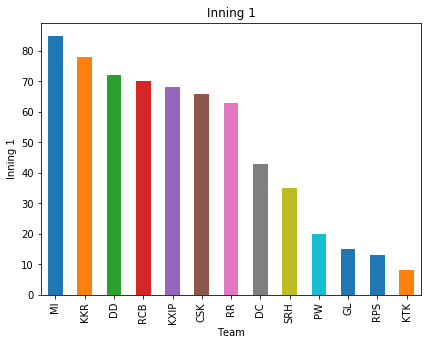

In [257]:
Inning_1 = matches_encoded['Inning_1'].value_counts()
winner = matches_df_updated['winner'].value_counts()

fig = plt.figure(figsize=(15,5))

A = fig.add_subplot(121)
A.set_xlabel('Team')
A.set_ylabel('Inning 1')
A.set_title("Inning 1")
toss_winner.plot(kind = 'bar')

In [245]:
le = LabelEncoder()
matches_valid_result = merged_df[merged_df['result'] == 'normal']
matches_valid_result.head()
matches_encoded = matches_valid_result.apply(le.fit_transform)

In [246]:
y = matches_valid_result['winner']
x = matches_encoded.drop(['winner'], axis=1)
x.head()

id  team1  team2  toss_winner  toss_decision  win_by_runs  win_by_wickets  \
0   0     12      9            9              1           35               0   
1   1      7     10           10              1            0               7   
2   2      3      4            4              1            0              10   
3   3     10      6            6              1            0               6   
4   4      9      2            9              0           15               0   

   result  match_id  Inning_1  Inning_2  
0       0         0       118        99  
1       0         1        95       113  
2       0         2        94       110  
3       0         3        74        91  
4       0         4        68        69

In [248]:
ohe = OneHotEncoder()
onehot_encoded = ohe.fit_transform(x)

In [251]:
models = []

models.append(("Logistic Regression:", LogisticRegression()))
models.append(("K-Nearest Neighbour:", KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree Classifier:", DecisionTreeClassifier()))
models.append(("Random Forest Classifier:", RandomForestClassifier(n_estimators=64)))
models.append(("MLP:", MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("GradientBoostingClassifier:", GradientBoostingClassifier()))
models.append(("SVC:", SVC(kernel = 'rbf', random_state = 0)))

print('Models appended...')

Models appended...


In [250]:
def run_models():
    results = []
    names = []
    for name,model in models:
        cv_result = cross_val_score(model, onehot_encoded, y, cv = 10, scoring = "accuracy")
        names.append(name)
        results.append(cv_result)
    for i in range(len(names)):
        print(names[i],results[i].mean()*100)

In [252]:
run_models()

C:\Users\ysidhwani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ysidhwani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ysidhwani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ysidhwani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\

Logistic Regression: 57.0284146768
K-Nearest Neighbour: 77.0334296067
Decision Tree Classifier: 85.4795278348
Random Forest Classifier: 91.5581732271
MLP: 70.6284736709
GradientBoostingClassifier: 97.9989907857
SVC: 14.5666417043


# Analysis

We have used Inning 1 aggregated score and Inning 2 score to predict winner. GradientBoostingClassifier gives us the accuracy of 97.99